# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Hồng Hạnh
- MSSV: 21127503
- Lớp: 21CLC08

# Import

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [205]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 10 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 10 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [206]:
# Cài đặt các hàm cần thiết ở đây

def read_data():
  train = pd.read_csv('train.csv')
  test = pd.read_csv('test.csv')

  X_train = train.iloc[:, :-1]
  y_train = train.iloc[:, -1]

  X_test = test.iloc[:, :-1]
  y_test = test.iloc[:, -1]

  return train, test, X_train, y_train, X_test, y_test

def detect_outliers(df, column, lower_percentile=0.25, upper_percentile=0.75, iqr_multiplier=1.5):
  q1 = df[column].quantile(lower_percentile)
  q3 = df[column].quantile(upper_percentile)
  iqr = q3 - q1
  lower_bound = q1 - iqr_multiplier * iqr
  upper_bound = q3 + iqr_multiplier * iqr
  upper_array = np.where(df[column]>=upper_bound)[0]
  lower_array = np.where(df[column]<=lower_bound)[0]
  return np.unique(np.concatenate((upper_array, lower_array),0))

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm)

In [207]:
# Phần code cho yêu cầu 1a

train, test, X_train, y_train, X_test, y_test = read_data()

X_train_1a = train.iloc[:, :11]
X_test_1a = test.iloc[:, :11]

regression_model = LinearRegression()
regression_model.fit(X_train_1a, y_train)
y_pred_1a = regression_model.predict(X_test_1a)

print("Coefficents: ", regression_model.coef_)
print("Intercept: ", regression_model.intercept_)

Coefficents:  [-23183.32950765    702.76679172   1259.0187879  -99570.60814074
  18369.9624496    1297.53200035  -8836.727123      141.75993906
    145.74234652    114.64331342  34955.75040521]
Intercept:  49248.089734810725


In [208]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
mae = mean_absolute_error(y_test, y_pred_1a)
print("MAE: ", mae)

MAE:  105052.52978823156


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -23183.330 \times \text{Gender} + 702.767 \times \text{10percentage} + 1259.019 \times \text{12percentage} -99570.608 \times \text{CollegeTier} + 18369.962 \times \text{Degree} + 1297.532 \times \text{collegeGPA} -8836.727 \times \text{CollegeCityTier} + 141.760 \times \text{English} + 145.742 \times \text{Logical} + 114.643 \times \text{Quant} + 34955.750 \times \text{Domain} + 49248.090$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [209]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

train, test, X_train, y_train, X_test, y_test = read_data()

train_personalities = train.iloc[:, -6:]
train_personalities = train_personalities.sample(frac=1).reset_index().iloc[:, 1:]

X_train_personalities = train_personalities.iloc[:, :-1]
X_test_personalities = test.iloc[:, -6:-1]

y_train_personalities = train_personalities.iloc[:, -1]

k_fold = KFold(n_splits=8).split(X_train_personalities, y_train_personalities)

#conscientiousness
X_train_conscientiousness = X_train_personalities.iloc[:, 0]
X_train_conscientiousness = np.array(X_train_conscientiousness).reshape(-1, 1)
X_test_conscientiousness = X_test_personalities.iloc[:, 0]
X_test_conscientiousness = np.array(X_test_conscientiousness).reshape(-1, 1)

#agreeableness
X_train_agreeableness = train_personalities.iloc[:, 1]
X_train_agreeableness = np.array(X_train_agreeableness).reshape(-1, 1)
X_test_agreeableness = X_test_personalities.iloc[:, 1]
X_test_agreeableness = np.array(X_test_agreeableness).reshape(-1, 1)

#extraversion
X_train_extraversion = train_personalities.iloc[:, 2]
X_train_extraversion = np.array(X_train_extraversion).reshape(-1, 1)
X_test_extraversion = X_test_personalities.iloc[:, 2]
X_test_extraversion = np.array(X_test_extraversion).reshape(-1, 1)

#nueroticism
X_train_nueroticism = train_personalities.iloc[:, 3]
X_train_nueroticism = np.array(X_train_nueroticism).reshape(-1, 1)
X_test_nueroticism = X_test_personalities.iloc[:, 3]
X_test_nueroticism = np.array(X_test_nueroticism).reshape(-1, 1)

#openess_to_experience
X_train_openess_to_experience = train_personalities.iloc[:, 4]
X_train_openess_to_experience = np.array(X_train_openess_to_experience).reshape(-1, 1)
X_test_openess_to_experience = X_test_personalities.iloc[:, 4]
X_test_openess_to_experience = np.array(X_test_openess_to_experience).reshape(-1, 1)

mae_conscientiousness = []
mae_agreeableness = []
mae_extraversion = []
mae_nueroticism = []
mae_openess_to_experience = []

regression_model = LinearRegression()
for k, (train, test) in enumerate(k_fold):
  #conscientiousness
  regression_model.fit(X_train_conscientiousness[train], y_train_personalities[train])
  y_pred_conscientiousness = regression_model.predict(X_test_conscientiousness)
  mae_conscientiousness.append(mean_absolute_error(y_test, y_pred_conscientiousness))

  #agreeableness
  regression_model.fit(X_train_agreeableness[train], y_train_personalities[train])
  y_pred_agreeableness = regression_model.predict(X_test_agreeableness)
  mae_agreeableness.append(mean_absolute_error(y_test, y_pred_agreeableness))

  #extraversion
  regression_model.fit(X_train_extraversion[train], y_train_personalities[train])
  y_pred_extraversion = regression_model.predict(X_test_extraversion)
  mae_extraversion.append(mean_absolute_error(y_test, y_pred_extraversion))

  #nueroticism
  regression_model.fit(X_train_nueroticism[train], y_train_personalities[train])
  y_pred_nueroticism = regression_model.predict(X_test_nueroticism)
  mae_nueroticism.append(mean_absolute_error(y_test, y_pred_nueroticism))

  #openess_to_experience
  regression_model.fit(X_train_openess_to_experience[train], y_train_personalities[train])
  y_pred_openess_to_experience = regression_model.predict(X_test_openess_to_experience)
  mae_openess_to_experience.append(mean_absolute_error(y_test, y_pred_openess_to_experience))

print("MAE")
print("conscientiousness: ", np.mean(mae_conscientiousness))
print("agreeableness: ", np.mean(mae_agreeableness))
print("extraversion: ", np.mean(mae_extraversion))
print("nueroticism: ", np.mean(mae_nueroticism))
print("openess_to_experience: ", np.mean(mae_openess_to_experience))

MAE
conscientiousness:  119452.69679070359
agreeableness:  118184.224844999
extraversion:  118952.24530845319
nueroticism:  119396.95232081469
openess_to_experience:  118956.33422995236


In [210]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

train, test, X_train, y_train, X_test, y_test = read_data()

X_train_agreeableness = X_train.iloc[:, -4]
X_train_agreeableness = np.array(X_train_agreeableness).reshape(-1, 1)
X_test_agreeableness = X_test.iloc[:, -4]
X_test_agreeableness = np.array(X_test_agreeableness).reshape(-1, 1)

best_personality_feature_model = LinearRegression()
best_personality_feature_model.fit(X_train_agreeableness, y_train)
y_pred_agreeableness = best_personality_feature_model.predict(X_test_agreeableness)

print("Coefficents: ", best_personality_feature_model.coef_)
print("Intercept: ", best_personality_feature_model.intercept_)

Coefficents:  [15834.93882339]
Intercept:  305037.28044079995


In [211]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
mae_agreeableness = mean_absolute_error(y_test, y_pred_agreeableness)
print("MAE: ", mae_agreeableness)

MAE:  118153.16335110964


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 15834.939 \times \text{agreeableness} + 305037.280$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [212]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

train, test, X_train, y_train, X_test, y_test = read_data()

train_skills = train.iloc[:, lambda x: [7, 8, 9, -1]]
train_skills = train_skills.sample(frac=1).reset_index().iloc[:, 1:]

X_train_skills = train_skills.iloc[:, :-1]
X_test_skills = test.iloc[:, 7:10]

y_train_skills = train_skills.iloc[:, -1]

k_fold = KFold(n_splits=8).split(X_train_skills, y_train_skills)

#English
X_train_English = X_train_skills.iloc[:, 0]
X_train_English = np.array(X_train_English).reshape(-1, 1)
X_test_English = X_test_skills.iloc[:, 0]
X_test_English = np.array(X_test_English).reshape(-1, 1)

#Logical
X_train_Logical = X_train_skills.iloc[:, 1]
X_train_Logical = np.array(X_train_Logical).reshape(-1, 1)
X_test_Logical = X_test_skills.iloc[:, 1]
X_test_Logical = np.array(X_test_Logical).reshape(-1, 1)

#Quant
X_train_Quant = X_train_skills.iloc[:, 2]
X_train_Quant = np.array(X_train_Quant).reshape(-1, 1)
X_test_Quant = X_test_skills.iloc[:, 2]
X_test_Quant = np.array(X_test_Quant).reshape(-1, 1)

mae_English = []
mae_Logical = []
mae_Quant = []

regression_model = LinearRegression()
for k, (train, test) in enumerate(k_fold):
  #English
  regression_model.fit(X_train_English[train], y_train_skills[train])
  y_pred_English = regression_model.predict(X_test_English)
  mae_English.append(mean_absolute_error(y_test, y_pred_English))

  #Logical
  regression_model.fit(X_train_Logical[train], y_train_skills[train])
  y_pred_Logical = regression_model.predict(X_test_Logical)
  mae_Logical.append(mean_absolute_error(y_test, y_pred_Logical))

  #Quant
  regression_model.fit(X_train_Quant[train], y_train_skills[train])
  y_pred_Quant = regression_model.predict(X_test_Quant)
  mae_Quant.append(mean_absolute_error(y_test, y_pred_Quant))

print("MAE")
print("English: ", np.mean(mae_English))
print("Logical: ", np.mean(mae_Logical))
print("Quant: ", np.mean(mae_Quant))

MAE
English:  115710.52276955088
Logical:  114845.63214581777
Quant:  108834.49723851224


In [215]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

train, test, X_train, y_train, X_test, y_test = read_data()

X_train_Quant = X_train.iloc[:, 9]
X_train_Quant = np.array(X_train_Quant).reshape(-1, 1)
X_test_Quant = X_test.iloc[:, 9]
X_test_Quant = np.array(X_test_Quant).reshape(-1, 1)

best_skill_feature_model = LinearRegression()
best_skill_feature_model.fit(X_train_Quant, y_train)
y_pred_Quant = best_skill_feature_model.predict(X_test_Quant)

print("Coefficents: ", best_skill_feature_model.coef_)
print("Intercept: ", best_skill_feature_model.intercept_)

Coefficents:  [368.85246384]
Intercept:  117759.72931230694


In [216]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model

mae_Quant = mean_absolute_error(y_test, y_pred_Quant)
print("MAE: ", mae_Quant)

MAE:  108814.05968837194


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 368.852 \times \text{Quant} + 117759.729$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

In [ ]:
# Trình bày các phần tìm ra mô hình

1. Pre-processing



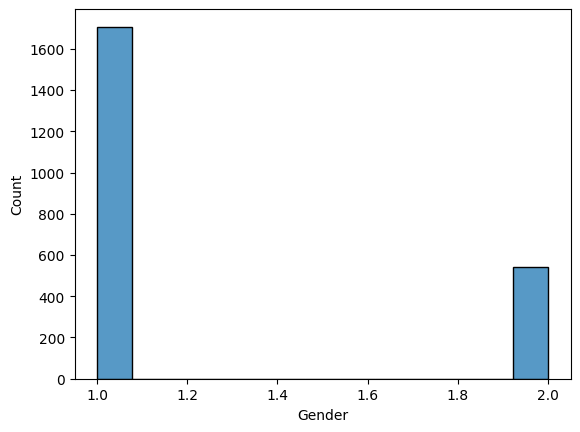

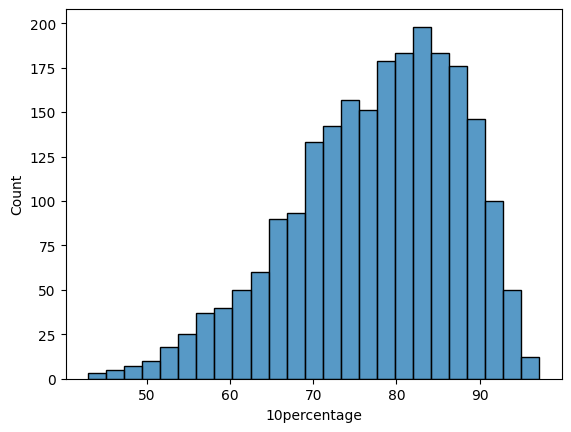

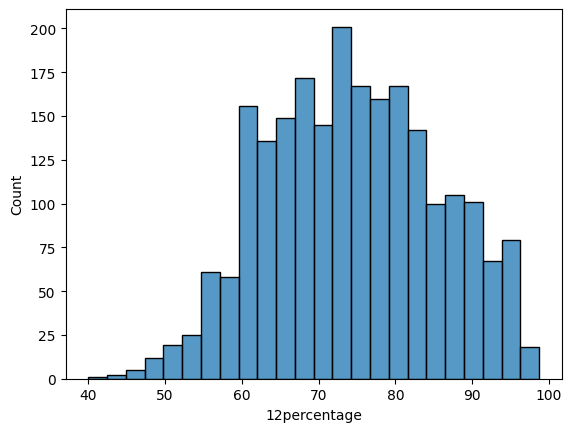

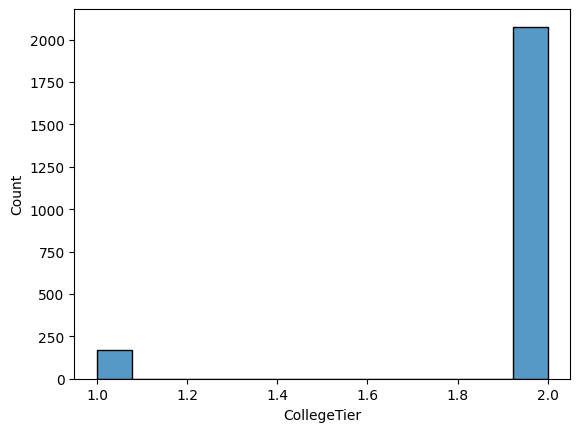

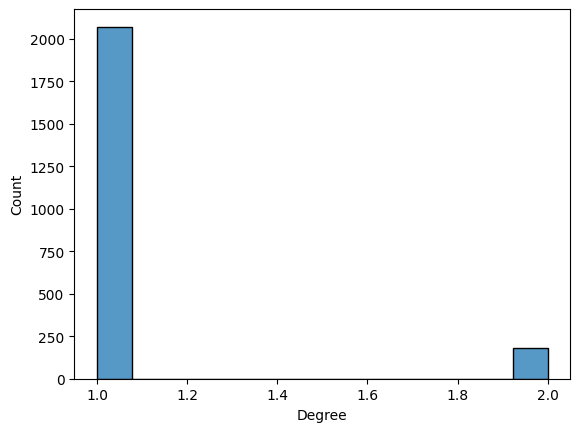

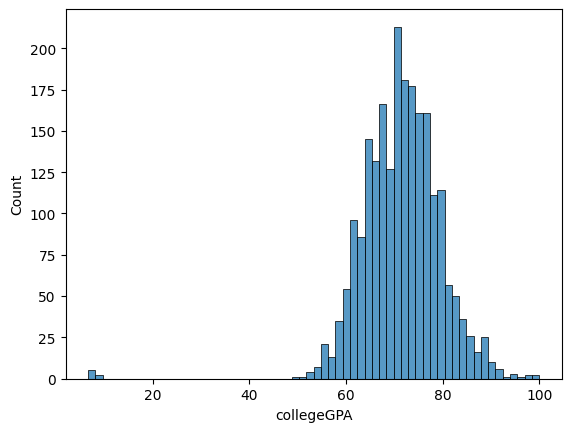

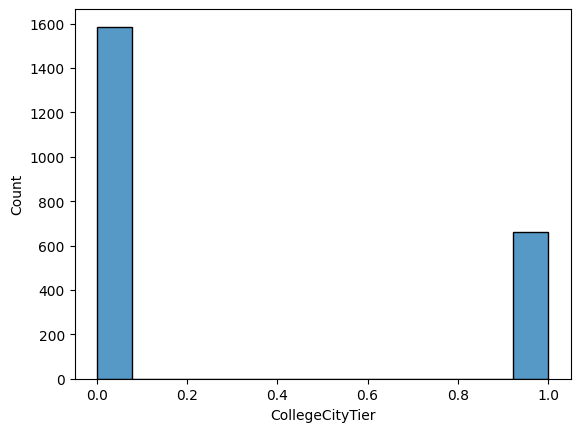

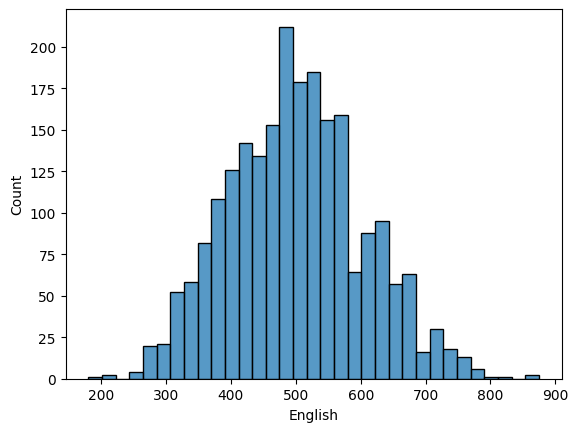

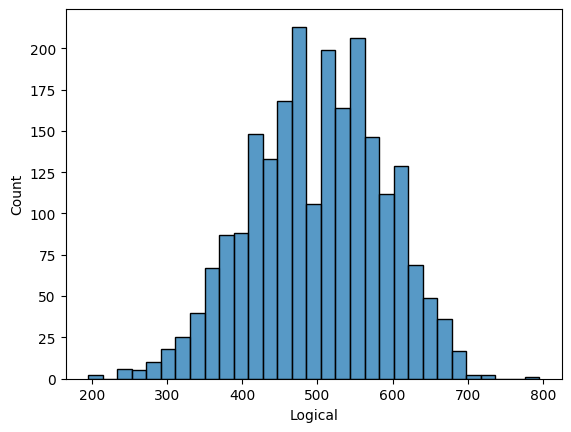

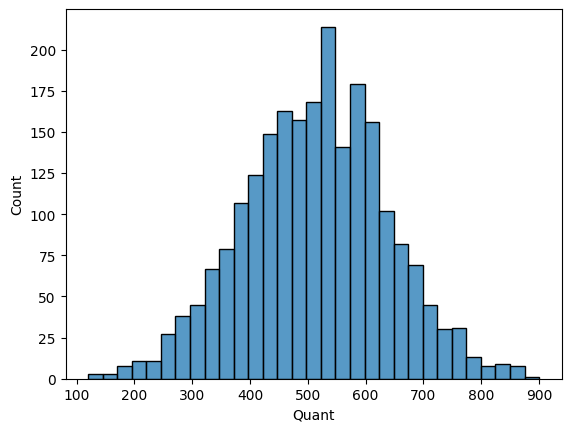

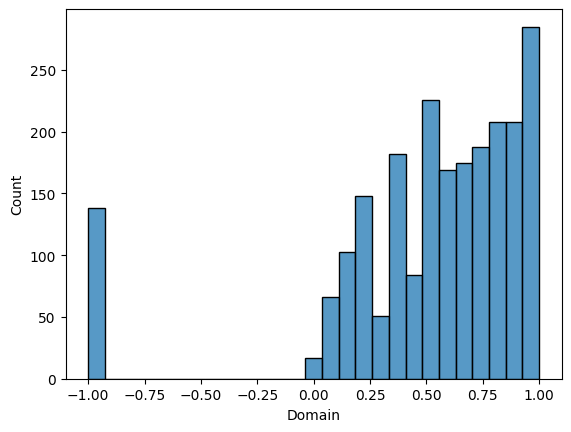

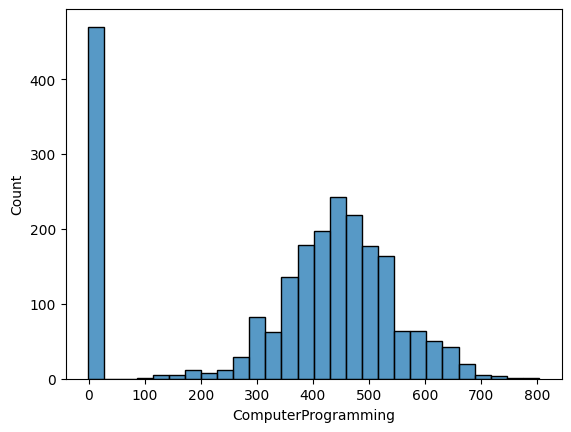

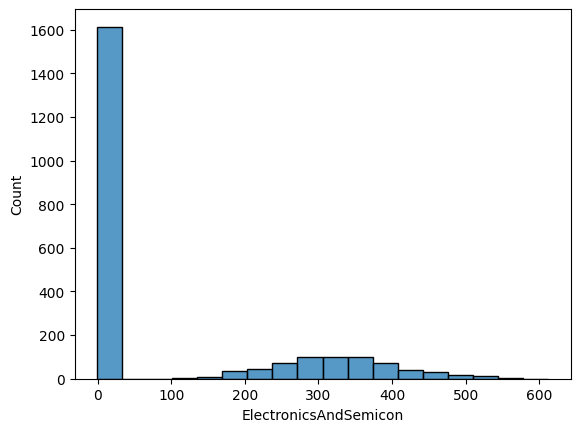

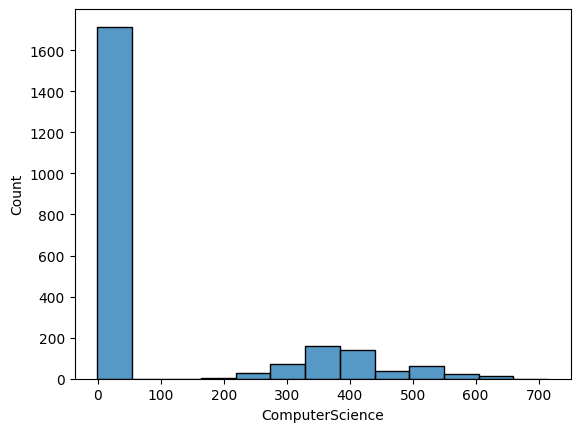

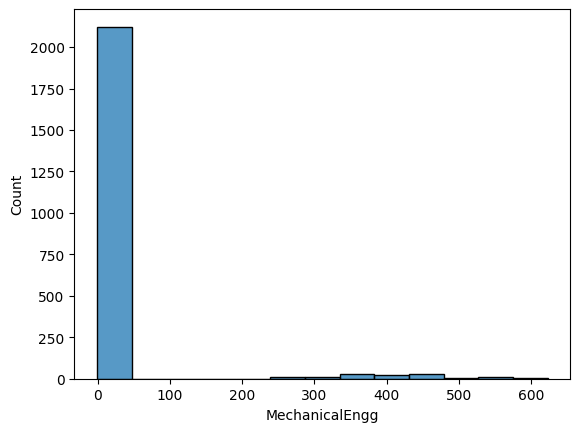

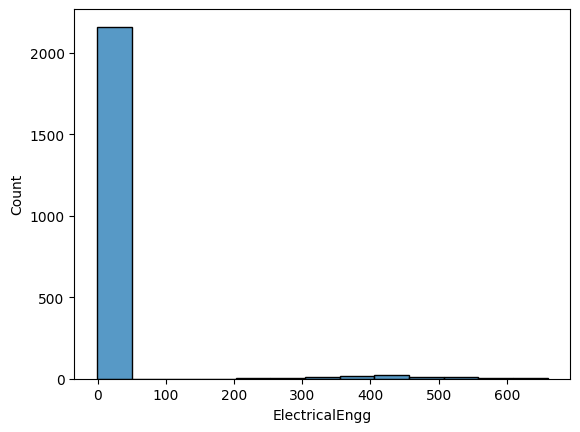

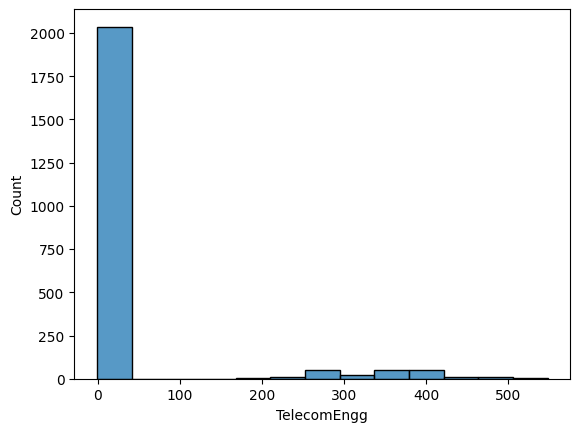

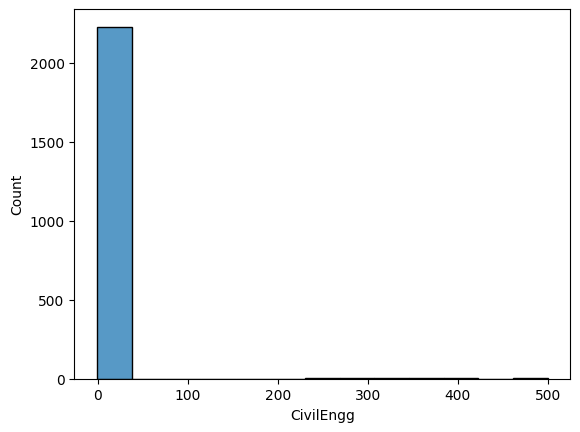

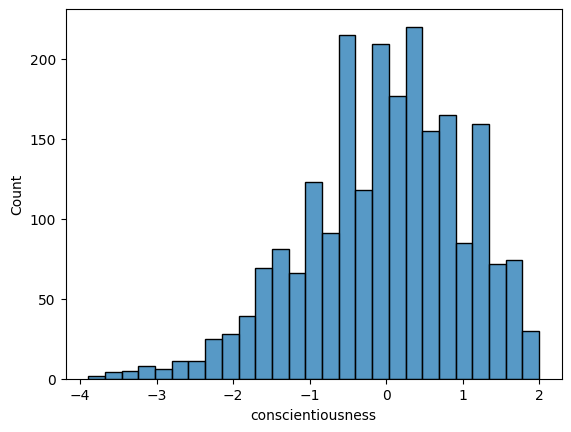

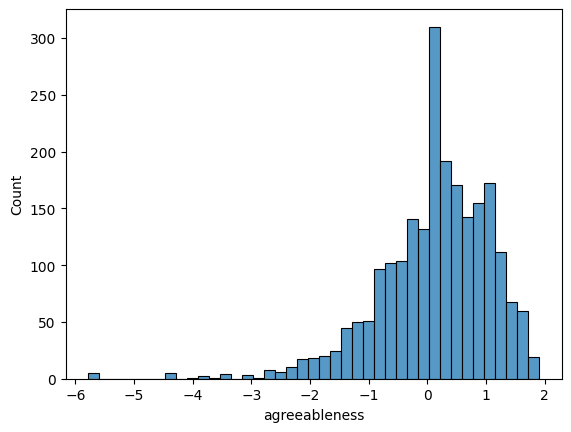

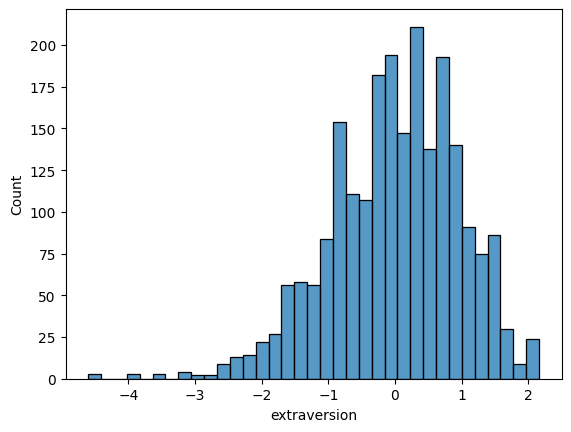

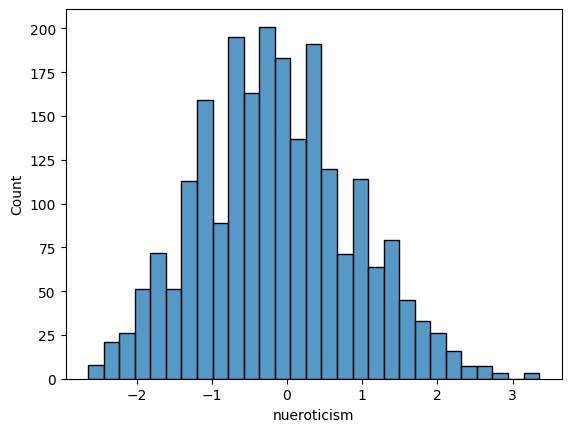

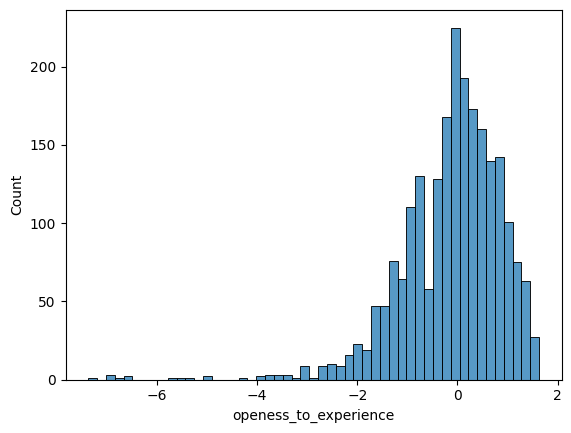

In [217]:
train, test, X_train, y_train, X_test, y_test = read_data()

for i in X_train.columns:
  sns.histplot(X_train[i])
  plt.show()

a. Có thể thấy các cột Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg tồn tại một giá trị nào đó với số lượng lớn

In [218]:
list = ["Domain", "ComputerProgramming", "ElectronicsAndSemicon", "ComputerScience", "MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"]
for i in list:
  print(X_train[i].value_counts())

-1.000000    138
 0.486747     73
 0.622643     66
 0.356536     63
 0.744758     60
            ... 
 0.415525      1
 0.371139      1
 0.017705      1
 0.179874      1
 0.184772      1
Name: Domain, Length: 203, dtype: int64
-1      470
 445     87
 435     87
 475     81
 395     78
       ... 
 454      1
 214      1
 105      1
 804      1
 245      1
Name: ComputerProgramming, Length: 74, dtype: int64
-1      1614
 333      62
 300      62
 366      61
 266      52
 400      51
 356      40
 324      38
 292      36
 233      29
 200      26
 433      26
 388      22
 260      20
 466      19
 228      17
 420      14
 500      12
 452      10
 196       8
 166       6
 533       6
 516       5
 548       3
 484       3
 566       2
 133       2
 612       1
 164       1
Name: ElectronicsAndSemicon, dtype: int64
-1      1714
 376      83
 346      74
 407      73
 438      65
 315      40
 500      39
 469      38
 284      32
 530      23
 253      20
 561      15
 592       9
 

Kiểm tra các giá trị thì thấy tồn tại giá trị -1 khá nhiều. Dự đoán đây là giá trị đại diện cho missing value \\
$\to$ Tiến hành kiểm tra và loại bỏ những cột nào có missing value $\ge$ 50%

In [219]:
missing_values = pd.DataFrame()
missing_values['Features'] = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
missing_percent = []
for i in missing_values.Features:
  missing_percent.append(X_train[i].value_counts()[-1] / X_train.shape[0] * 100)
missing_values['Missing Percent'] = missing_percent
missing_values.sort_values(by=['Missing Percent'])

,Features,Missing Percent
0,Domain,6.138790
1,ComputerProgramming,20.907473
2,ElectronicsAndSemicon,71.797153
3,ComputerScience,76.245552
6,TelecomEngg,90.569395
4,MechanicalEngg,94.439502
5,ElectricalEngg,96.129893
7,CivilEngg,99.110320


$\to$ Loại bỏ các cột ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg

In [220]:
X_train.drop(['ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'], axis='columns', inplace=True)

b. Phân loại dữ liệu thành 2 kiểu dữ liệu chính: categorical data và numerical data
*   Categorical: Gender, CollegeTier, Degree, CollegeCityTier
*   Numerical: 10percentage, 12percentage, collegeGPA, English, Logical, Quant, Domain, ComputerProgramming, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience

In [221]:
categorical = ["Gender", "CollegeTier", "Degree", "CollegeCityTier"]
numerical = ["10percentage", "12percentage", "collegeGPA", "English", "Logical", "Quant", "Domain", "ComputerProgramming", "conscientiousness", "agreeableness", "extraversion", "nueroticism", "openess_to_experience"]

X_train_categorical = X_train[categorical]
X_train_numerical = X_train[numerical]

c. Đối với numerical data, kiểm tra và loại bỏ outliers \\
[detect and remove outliers](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)

10percentage


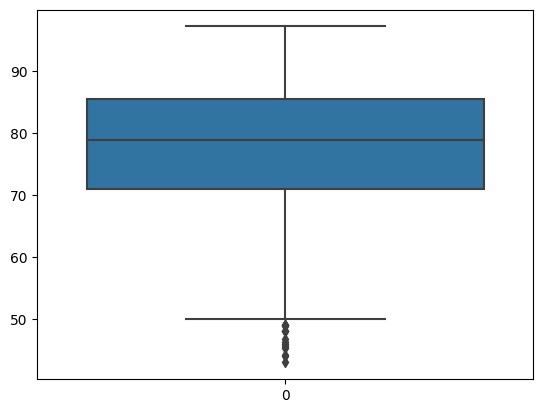

12percentage


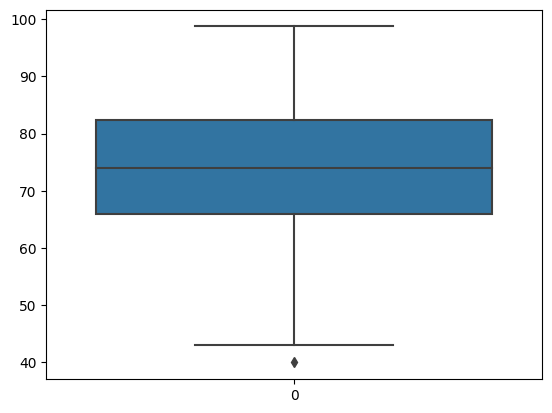

collegeGPA


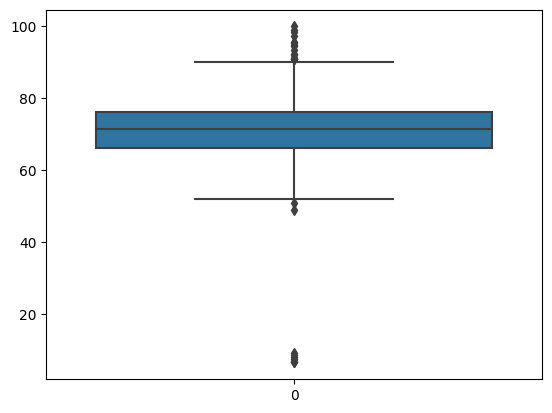

English


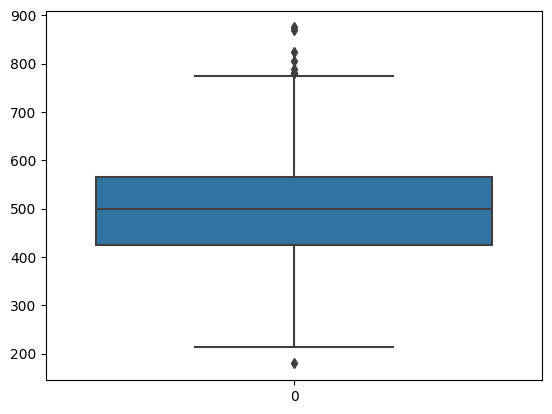

Logical


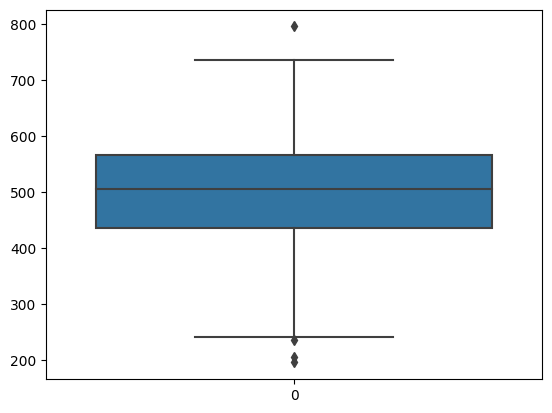

Quant


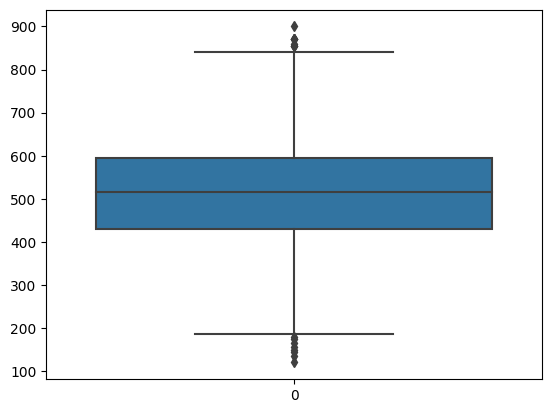

Domain


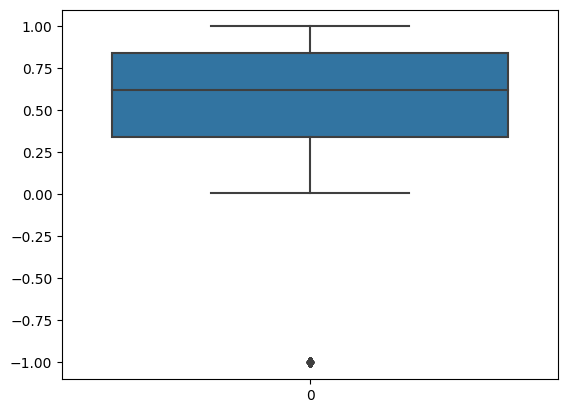

ComputerProgramming


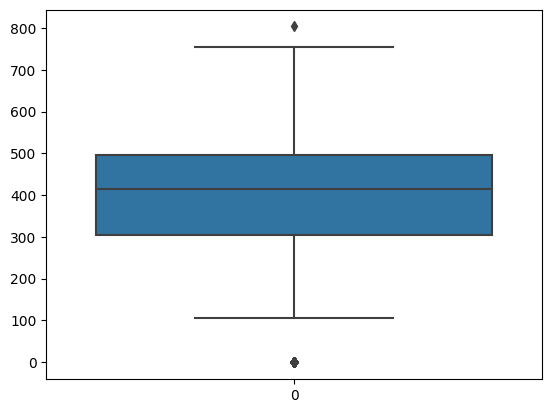

conscientiousness


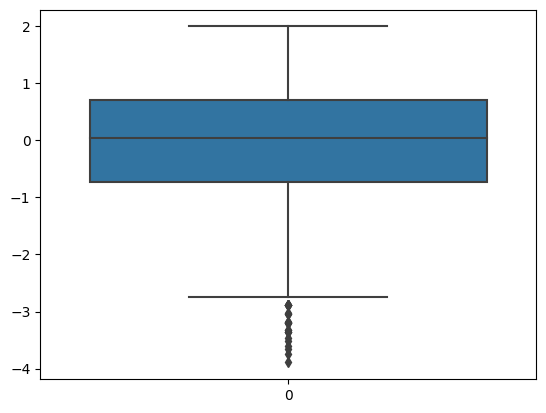

agreeableness


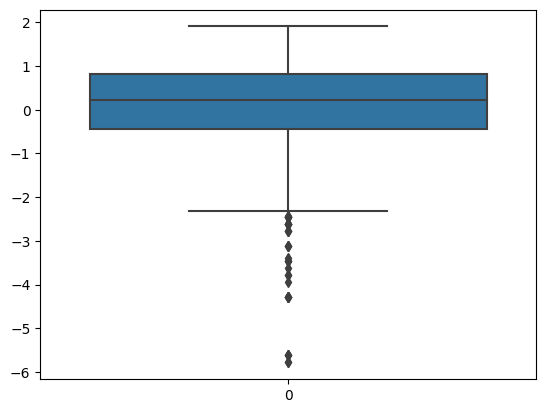

extraversion


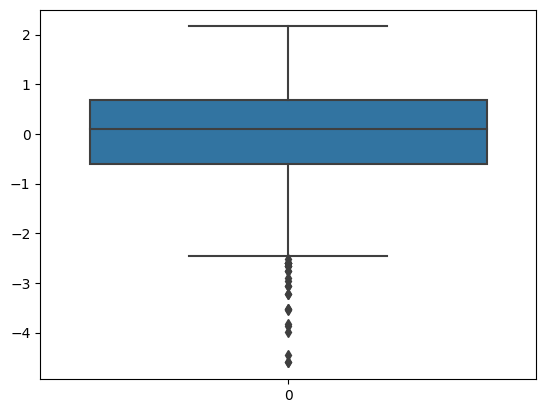

nueroticism


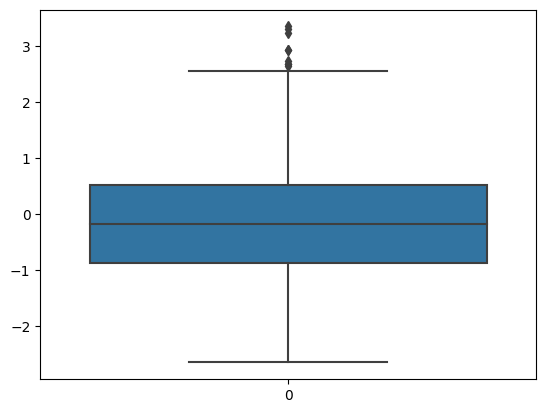

openess_to_experience


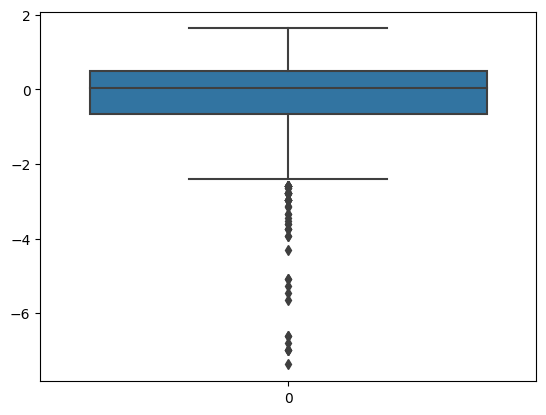

In [222]:
for col in numerical:
  print(col)
  sns.boxplot(X_train_numerical[col])
  plt.show()

10percentage


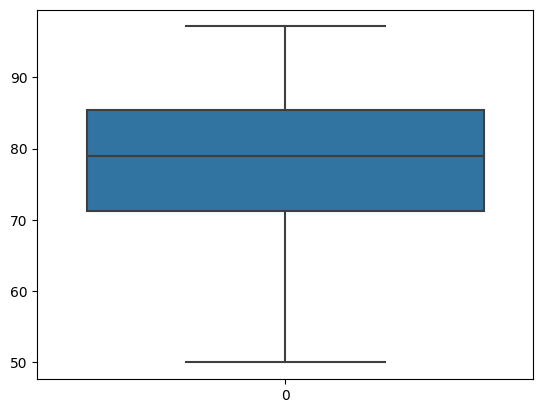

12percentage


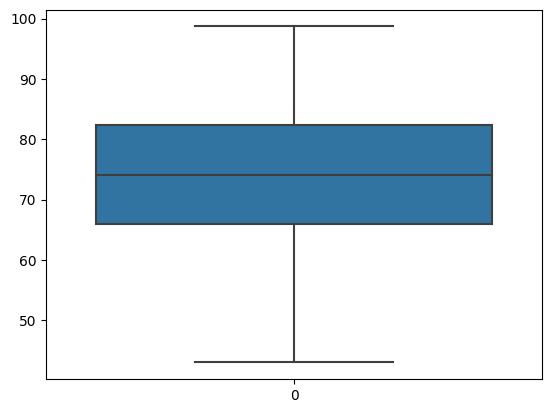

collegeGPA


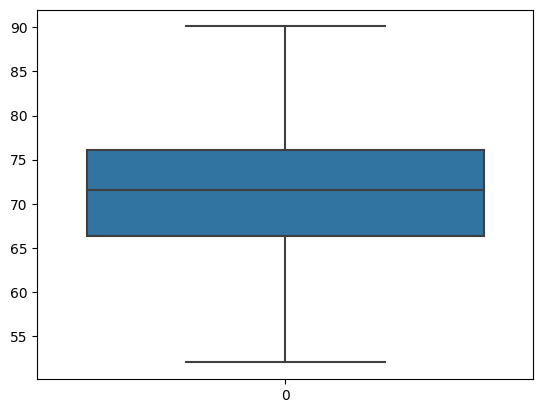

English


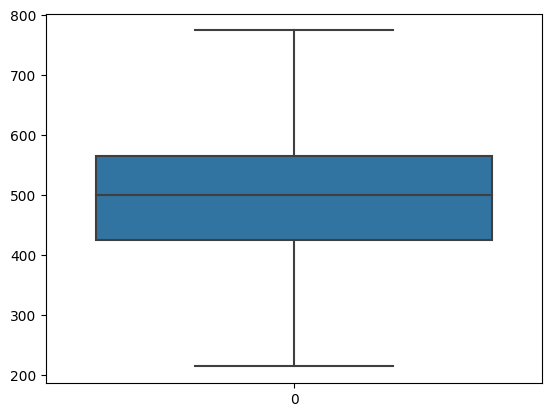

Logical


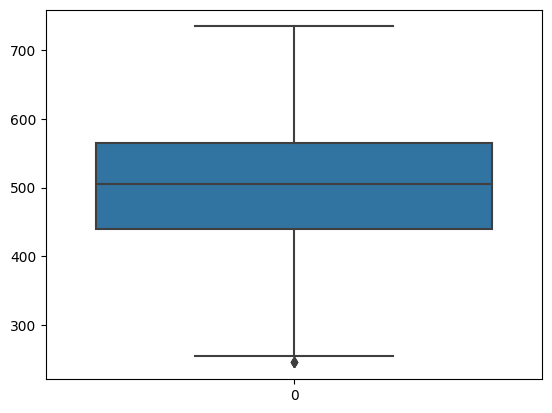

Quant


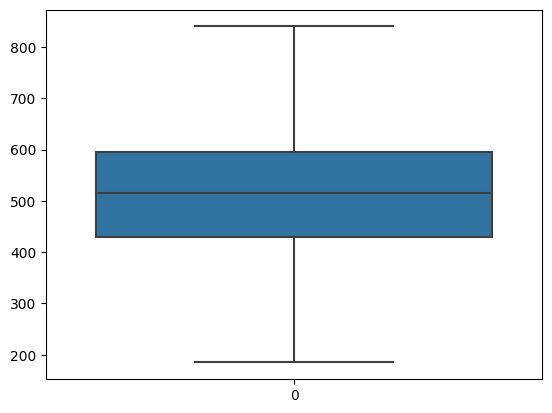

Domain


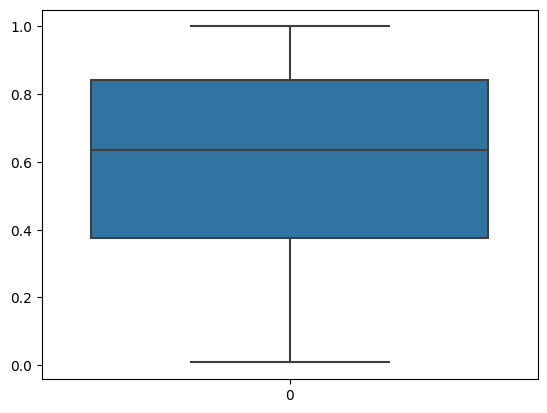

ComputerProgramming


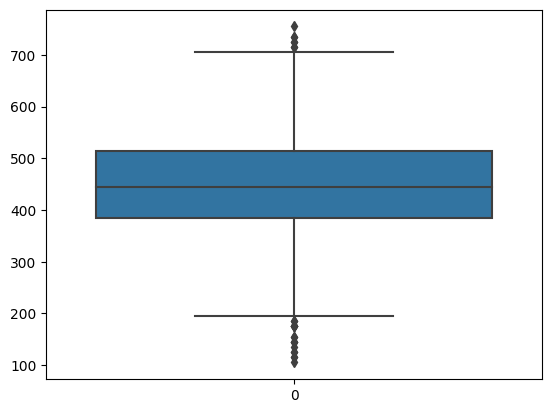

conscientiousness


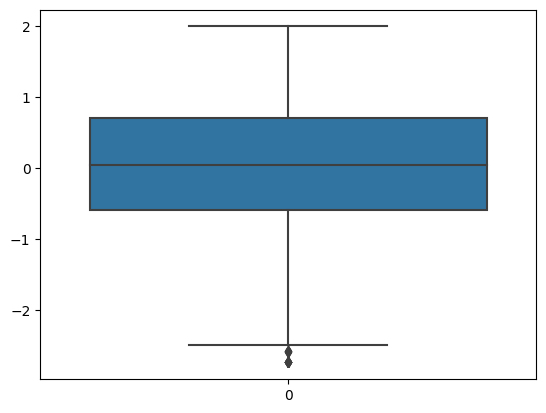

agreeableness


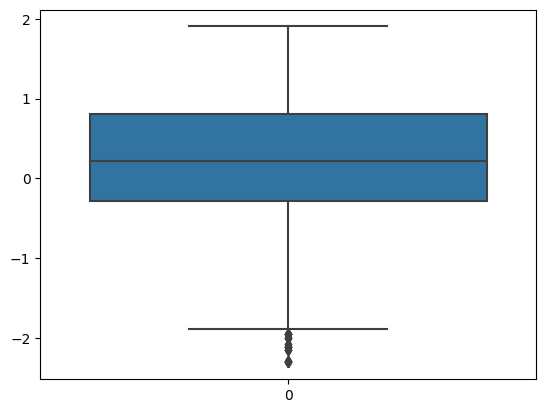

extraversion


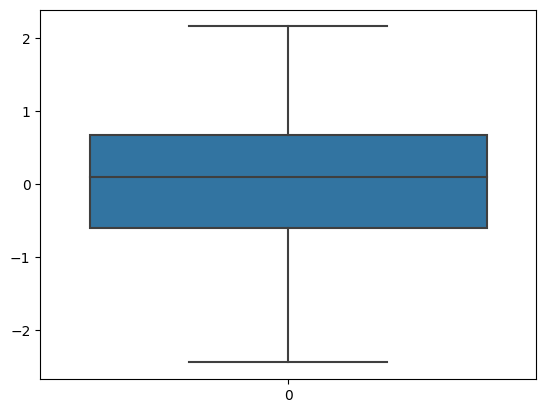

nueroticism


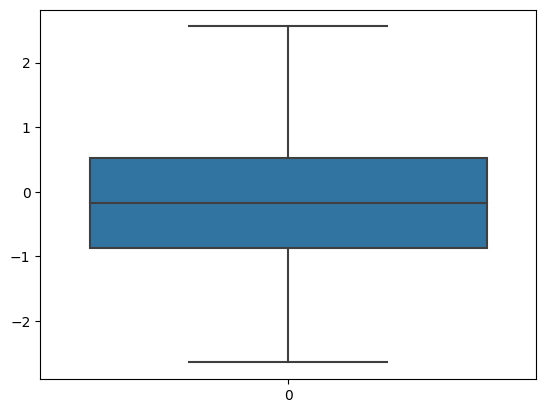

openess_to_experience


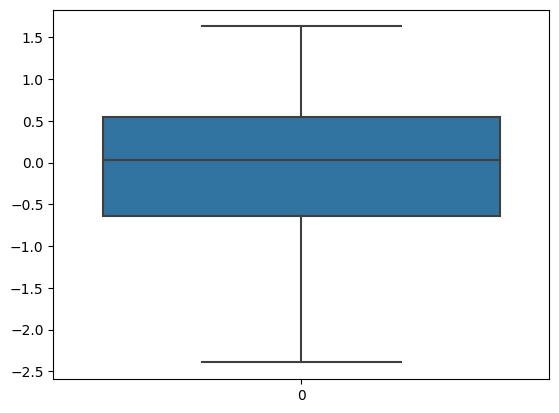

In [223]:
for col in numerical:
  outliers_array = detect_outliers(X_train_numerical, col)
  X_train_numerical.loc[outliers_array, col] = np.nan

for col in numerical:
  print(col)
  sns.boxplot(X_train_numerical[col])
  plt.show()

2. Tìm kiếm sự tương quan giữa các đặc trưng

a. Trong categorical data \\
[Pearson’s Chi-Square Test](https://www.geeksforgeeks.org/python-pearsons-chi-square-test/)

In [224]:
categorical_pairs = []

for i in range(len(categorical)):
    for j in range(i+1, len(categorical)):
        categorical_pairs.append((categorical[i], categorical[j]))

for pair in categorical_pairs:
  cross_tab = pd.crosstab(X_train_categorical[pair[0]], X_train_categorical[pair[1]])
  print(cross_tab)
  chi2, p, dof, ex = stats.chi2_contingency(cross_tab)
  print("p-value: ", p)

CollegeTier    1     2
Gender                
1            138  1569
2             34   507
p-value:  0.2007374423909042
Degree     1    2
Gender           
1       1570  137
2        500   41
p-value:  0.8069753519690535
CollegeCityTier     0    1
Gender                    
1                1224  483
2                 362  179
p-value:  0.03784357116700676
Degree          1    2
CollegeTier           
1             156   16
2            1914  162
p-value:  0.5804944813244799
CollegeCityTier     0    1
CollegeTier               
1                  96   76
2                1490  586
p-value:  1.5215681024774452e-05
CollegeCityTier     0    1
Degree                    
1                1460  610
2                 126   52
p-value:  1.0


Cặp đặc trưng có p-value $\le$ 0.05 (phụ thuộc): Gender - CollegeCityTier \\

b. Trong numerical data


<Axes: >

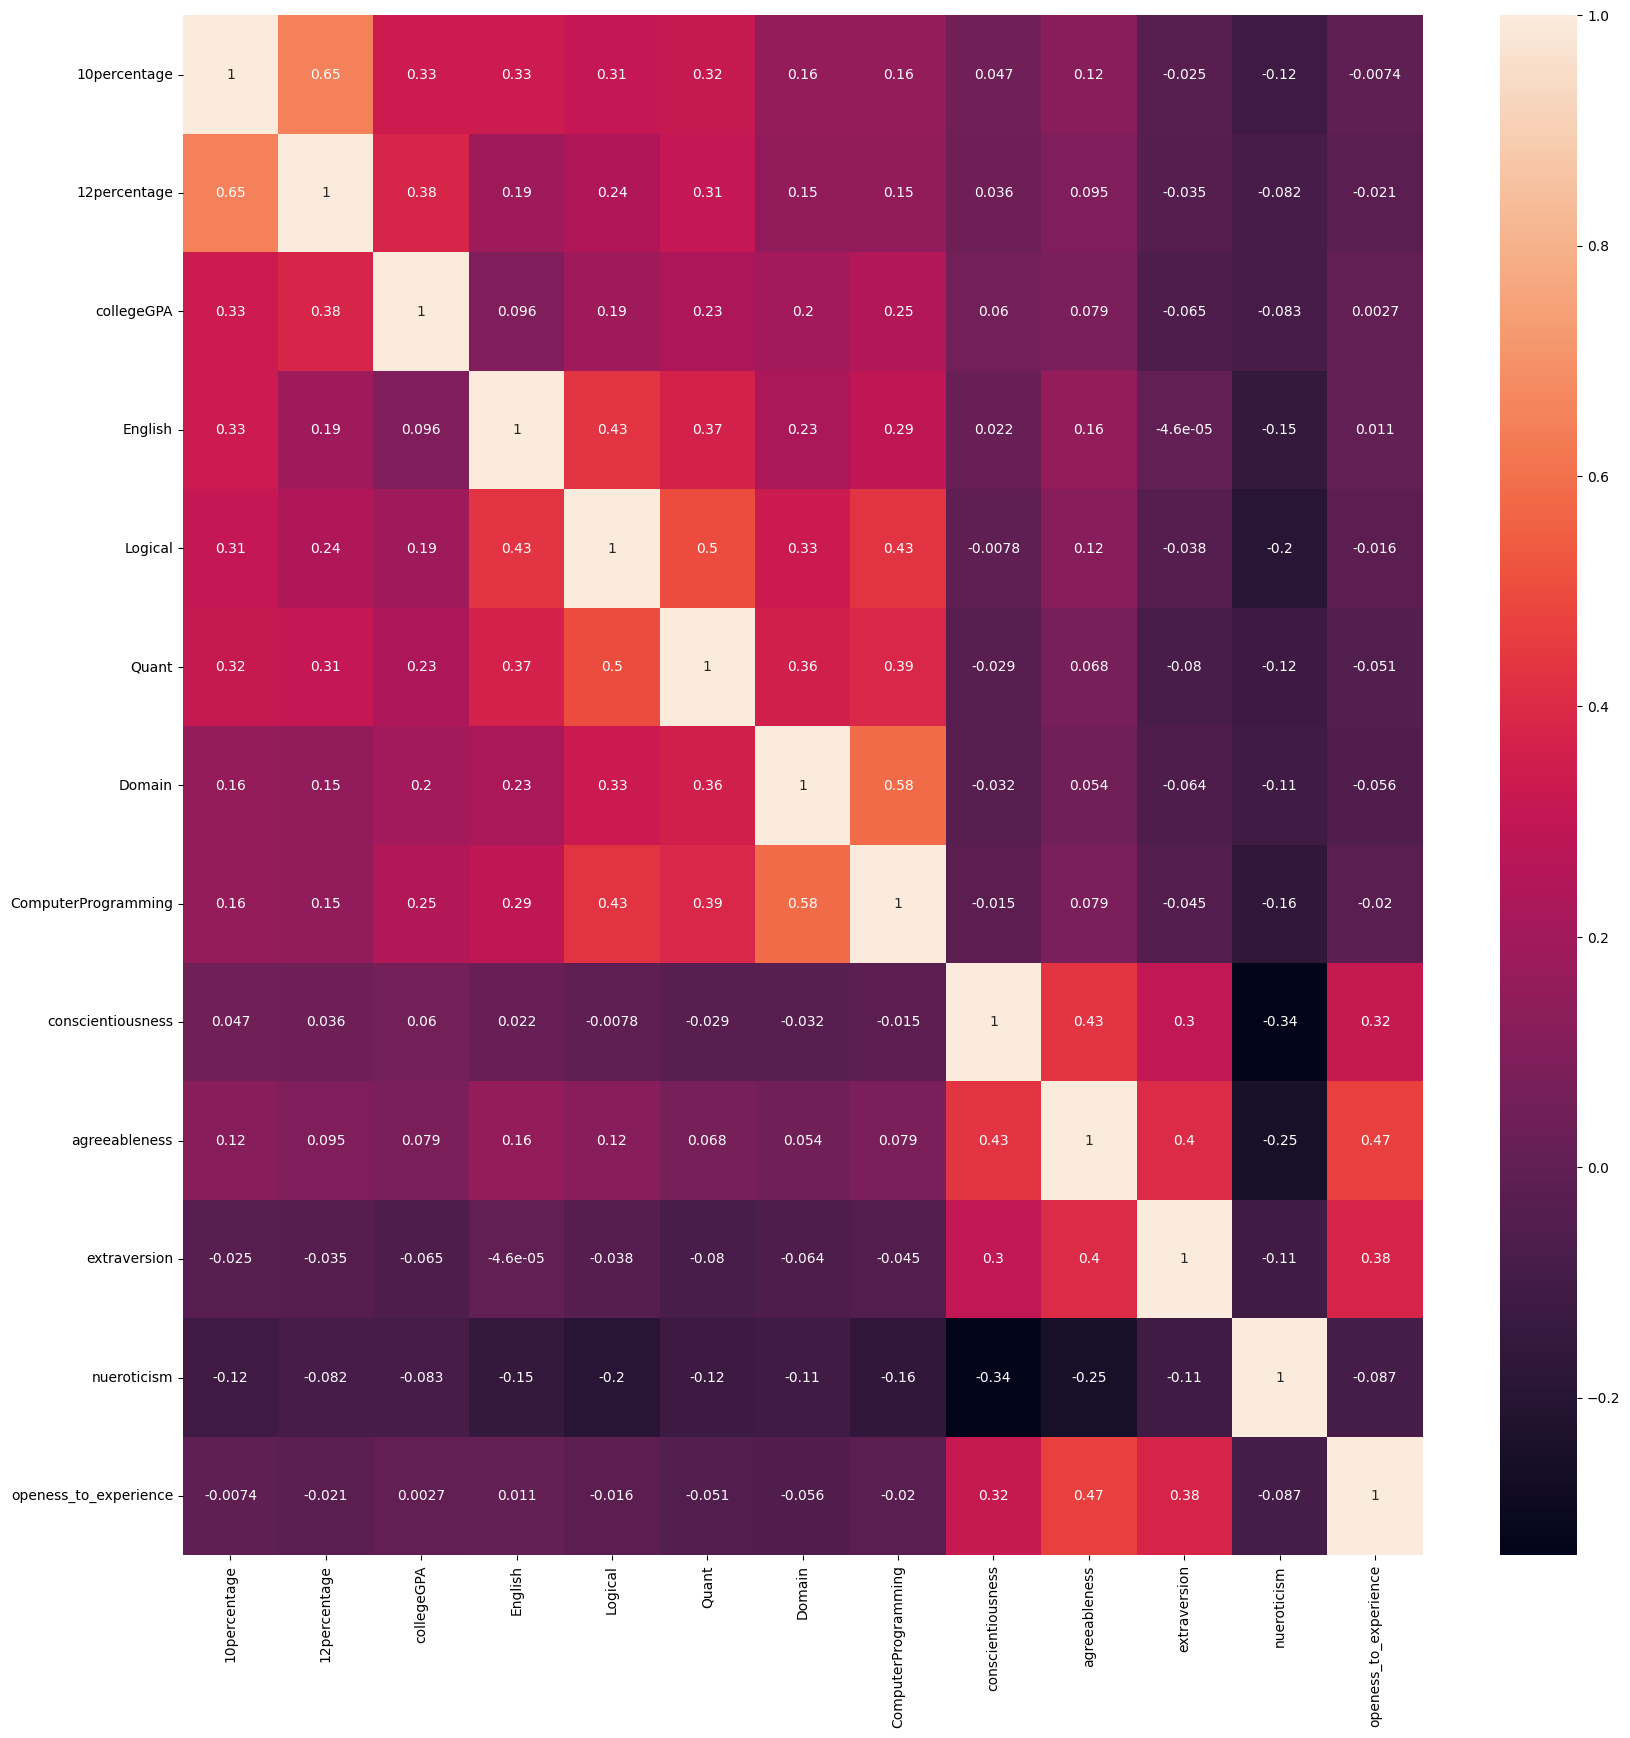

In [225]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_numerical.corr(method='pearson'), annot=True)

In [226]:
corr = X_train_numerical.corr()
corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))
corr = corr.unstack().dropna()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
sorted_corr = corr.sort_values()

print(sorted_corr)

nueroticism            conscientiousness     -0.336813
                       agreeableness         -0.248617
                       Logical               -0.195424
                       ComputerProgramming   -0.162343
                       English               -0.151200
                                                ...   
Logical                English                0.433735
openess_to_experience  agreeableness          0.466223
Quant                  Logical                0.501109
ComputerProgramming    Domain                 0.584857
12percentage           10percentage           0.647064
Length: 78, dtype: float64


<ipython-input-226-43e1cd9ad666>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr = corr.mask(np.tril(np.ones(corr.shape)).astype(np.bool))


Ta có 2 cặp đặc trưng 12percentage - 10percentage và ComputerProgramming - Domain tương quan thuận mạnh



## Thử nghiệm, so sánh các mô hình

In [227]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

train, test, X_train, y_train, X_test, y_test = read_data()

train_shuffled = train.sample(frac=1).reset_index().iloc[:, 1:]

X_train = train_shuffled[["Gender", "CollegeTier", "Degree", "CollegeCityTier", "10percentage", "12percentage", "collegeGPA", "English", "Logical", "Quant", "Domain", "ComputerProgramming", "conscientiousness", "agreeableness", "extraversion", "nueroticism", "openess_to_experience"]]
y_train = train_shuffled.iloc[:, -1]

k_fold = KFold(n_splits=8).split(X_train, y_train)

# Gender − CollegeCityTier
X_train_model_1 = X_train[["Gender", "CollegeCityTier"]]
X_train_model_1 = np.array(X_train_model_1.iloc[:, 0] * 2 + X_train_model_1.iloc[:, 1]).reshape(-1, 1)
X_test_model_1 = X_test[["Gender", "CollegeCityTier"]]
X_test_model_1 = np.array(X_test_model_1.iloc[:, 0] * 2 + X_test_model_1.iloc[:, 1]).reshape(-1, 1)

# 12percentage - 10percentage
X_train_model_2 = X_train[["12percentage", "10percentage"]]
X_test_model_2 = X_test[["12percentage", "10percentage"]]

# skill - personality - 12percentage - 10percentage - ComputerProgramming - domain - Gender - CollegeCityTier
X_train_model_3 = X_train[["Quant", "agreeableness"]]
X_train_model_3["percentage"] = (X_train["12percentage"] + X_train["10percentage"]) / 2
X_train_model_3["CD"] = X_train["ComputerProgramming"] + X_train["Domain"]
X_train_model_3["GC"] = X_train["Gender"] * 2 + X_train["CollegeCityTier"]
X_test_model_3 = X_test[["Quant", "agreeableness"]]
X_test_model_3["percentage"] = (X_test["12percentage"] + X_test["10percentage"]) / 2
X_test_model_3["CD"] = X_test["ComputerProgramming"] + X_test["Domain"]
X_test_model_3["GC"] = X_test["Gender"] * 2 + X_test["CollegeCityTier"]

mae_model_1 = []
mae_model_2 = []
mae_model_3 = []

regression_model = LinearRegression()
for k, (train, test) in enumerate(k_fold):
  #12percentage - 10percentage
  regression_model.fit(X_train_model_2.iloc[train, :], y_train[train])
  y_pred_model_2 = regression_model.predict(X_test_model_2)
  mae_model_2.append(mean_absolute_error(y_test, y_pred_model_2))

  #Quant - Logical
  regression_model.fit(X_train_model_3.iloc[train, :], y_train[train])
  y_pred_model_3 = regression_model.predict(X_test_model_3)
  mae_model_3.append(mean_absolute_error(y_test, y_pred_model_3))

  #Gender − CollegeCityTier
  regression_model.fit(X_train_model_1[train], y_train[train])
  y_pred_model_1 = regression_model.predict(X_test_model_1)
  mae_model_1.append(mean_absolute_error(y_test, y_pred_model_1))

print(np.mean(mae_model_1))
print(np.mean(mae_model_2))
print(np.mean(mae_model_3))

119312.31554102505
110971.46934260079
104717.69128546197


<ipython-input-227-0e80e02c42e4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_model_3["percentage"] = (X_train["12percentage"] + X_train["10percentage"]) / 2
<ipython-input-227-0e80e02c42e4>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_model_3["CD"] = X_train["ComputerProgramming"] + X_train["Domain"]
<ipython-input-227-0e80e02c42e4>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [228]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

train, test, X_train, y_train, X_test, y_test = read_data()

X_train_model_3 = X_train[["Quant", "agreeableness"]]
X_train_model_3["percentage"] = (X_train["12percentage"] + X_train["10percentage"]) / 2
X_train_model_3["CD"] = X_train["ComputerProgramming"] + X_train["Domain"]
X_train_model_3["GC"] = X_train["Gender"] * 2 + X_train["CollegeCityTier"]
X_test_model_3 = X_test[["Quant", "agreeableness"]]
X_test_model_3["percentage"] = (X_test["12percentage"] + X_test["10percentage"]) / 2
X_test_model_3["CD"] = X_test["ComputerProgramming"] + X_test["Domain"]
X_test_model_3["GC"] = X_test["Gender"] * 2 + X_test["CollegeCityTier"]


my_best_model = LinearRegression()
my_best_model.fit(X_train_model_3, y_train)
y_pred_model_3 = my_best_model.predict(X_test_model_3)

print("Coefficents: ", my_best_model.coef_)
print("Intercept: ", my_best_model.intercept_)

Coefficents:  [   255.9725127    9480.81292923   2668.11572664    104.77433951
 -10124.61219979]
Intercept:  -37285.77462650451


<ipython-input-228-8ce1f727b194>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_model_3["percentage"] = (X_train["12percentage"] + X_train["10percentage"]) / 2
<ipython-input-228-8ce1f727b194>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_model_3["CD"] = X_train["ComputerProgramming"] + X_train["Domain"]
<ipython-input-228-8ce1f727b194>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [229]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
mae_model_3 = mean_absolute_error(y_test, y_pred_model_3)
print("MAE: ", mae_model_3)

MAE:  104601.4384174429


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 255.973 \times \text{Quant} + 9480.813 \times \text{agreeableness} + 2668.116 \times \frac{\text{10percentage} + \text{12percentage}}{2} + 104.774 \times (\text{ComputerProgramming} + \text{Domain}) - 10124.612 \times (\text{Gender} \times 2 + \text{CollegeCityTier})$$